In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

In [2]:
df =sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
encoder = LabelEncoder()
df['species'] =encoder.fit_transform(df['species'])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df = df[['sepal_length','petal_length','species']]

In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2,random_state=41)

In [9]:
Log = LogisticRegression(multi_class='multinomial')

In [10]:
Log.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [11]:
Log.intercept_

array([ 11.70395733,   0.84760768, -12.55156501])

In [12]:
Log.coef_

array([[-0.2323257 , -2.9196209 ],
       [ 0.51085313, -0.41581833],
       [-0.27852742,  3.33543923]])

In [13]:
y_pred = Log.predict(X_test)

In [14]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [15]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,9,0,0
1,0,10,1
2,0,0,10


In [16]:
query = np.array([[3.4,2.7]])
Log.predict_proba(query)

c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.27310424e-01, 1.72242831e-01, 4.46745642e-04]])

In [17]:
Log.predict(query)

c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


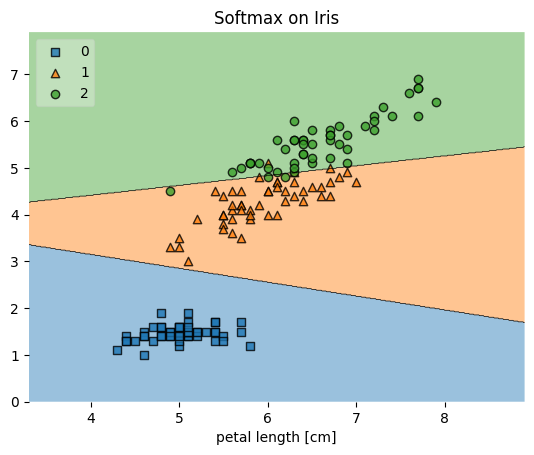

In [21]:

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, Log, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()